### Lab Assignment No. 9 - Random Forest Algorithm 

Problem Statement: Implement Random Forest Algorithm on the given dataset

#### Theory

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

#### How does Random Forest Algorithm work?

Random Forest works in two-phase first is to create the random forest by combining N decision tree, and second is to make predictions for each tree created in the first phase.

The Working process can be explained in the below steps and diagram:

Step-1: Select random K data points from the training set.

Step-2: Build the decision trees associated with the selected data points (Subsets).

Step-3: Choose the number N for decision trees that you want to build.

Step-4: Repeat Step 1 & 2.

Step-5: For new data points, find the predictions of each decision tree, and assign the new data points to the category that wins the majority votes.

Creating and Visualizing a Random Forest Classification Model in Machine Learning Using Python

Step 1: Load Pandas and Numpy library and the dataset using Pandas amd Numpy

In [16]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd

In [17]:
df = pd.read_csv("cancer_data.csv")
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,diagnosis
0,17.99,10.38,122.80,1001.0,1
1,20.57,17.77,132.90,1326.0,1
2,19.69,21.25,130.00,1203.0,1
3,11.42,20.38,77.58,386.1,1
4,20.29,14.34,135.10,1297.0,1


Step 2: Define the features and the target

In [18]:
X = pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1])

In [19]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean
0,17.99,10.38,122.80,1001.0
1,20.57,17.77,132.90,1326.0
2,19.69,21.25,130.00,1203.0
3,11.42,20.38,77.58,386.1
4,20.29,14.34,135.10,1297.0
...,...,...,...,...
564,21.56,22.39,142.00,1479.0
565,20.13,28.25,131.20,1261.0
566,16.60,28.08,108.30,858.1
567,20.60,29.33,140.10,1265.0


In [20]:
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


Step 3: Split the dataset into train and test sklearn

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Step 4: Import the random forest classifier function from sklearn ensemble module. Build the random forest classifier model with the help of the random forest classifier function

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20, criterion='gini', random_state=1, max_depth=3)
classifier.fit(X_train, y_train)

C:\Users\UMAP\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=3, n_estimators=20, random_state=1)

Step 5: Predict values using the random forest classifier model

In [25]:
y_pred = classifier.predict(X_test)

Step 6: Evaluate the random forest classifier model

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[56 12]
 [ 2 44]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        68
           1       0.79      0.96      0.86        46

    accuracy                           0.88       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.88      0.88       114

0.8771929824561403


Step 7: Let us find out important features and visualize them using Seaborn

In [27]:
feature_imp = pd.Series(classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

radius_mean       0.504746
perimeter_mean    0.273105
area_mean         0.148717
texture_mean      0.073432
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

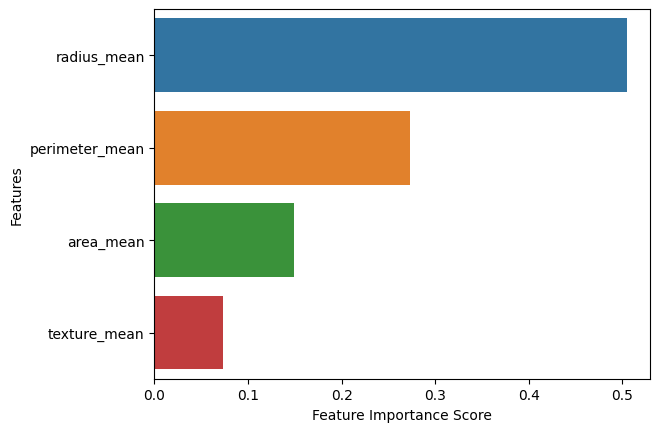

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show

Step 8: Import the SelectFromModel function. We will pass the classifier object we’ve created above. Also, we will add a threshold value of 0.1

In [29]:
from sklearn.feature_selection import SelectFromModel
feat_sel = SelectFromModel(classifier, threshold=0.1)
feat_sel.fit(X_train, y_train)

C:\Users\UMAP\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


SelectFromModel(estimator=RandomForestClassifier(max_depth=3, n_estimators=20,
                                                 random_state=1),
                threshold=0.1)

Step 9: With the help of the ‘transform’ method, we will pick the important features and store them in new train and test objects

In [30]:
X_imp_train = feat_sel.transform(X_train)
X_imp_test = feat_sel.transform(X_test)

Step 10: Let us now build a new random forest classifier model (so that we can compare the results of this model with the old one)

In [31]:
clf_imp = RandomForestClassifier(n_estimators=20, criterion='gini', random_state=1, max_depth=7)
clf_imp.fit(X_imp_train, y_train)

C:\Users\UMAP\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=7, n_estimators=20, random_state=1)

Step 11: Let us see the accuracy result of the old model

In [32]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8771929824561403

Step 12: Let us see the accuracy result of the new model after feature selection

In [33]:
y_imp_pred = clf_imp.predict(X_imp_test)
accuracy_score(y_test, y_imp_pred)

0.868421052631579

Conclusion: After the feature selection process, the accuracy score is decreased. But, we have successfully picked out the important features at a small cost of accuracy.

Also, automatic feature selection reduces the complexity of the model but does not necessarily increase the accuracy. In order to get the desired accuracy, we have to perform the feature selection process manually.